# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [66]:
sinasc_raw = pd.read_csv('/users/rodri/SINASC_RO_2019.csv')
sinasc_raw.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


VAMOS CRIAR UMA VARIÁVEL PARA AGRUPARMOS OS DADOS IMPORTANTES:

In [35]:
sinasc_municipio = sinasc_raw[['IDADEMAE','IDADEPAI','munResNome']]
sinasc_municipio.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


VAMOS CRIAR UM GROUPBY PARA SABERMOS A MÉDIA DE IDADES DOS PAIS POR DETERMINADA REGIÃO

In [37]:
sinasc_municipio.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

VAMOS CRIAR UMA VARIÁVEL PARA AGRUPARMOS OS DADOS IMPORTANTES:

In [38]:
sinasc_nascimento = sinasc_raw[['DTNASC','SEXO','PESO','ESCMAE']]
sinasc_nascimento.head()

,DTNASC,SEXO,PESO,ESCMAE
0,2019-02-19,Masculino,3685,8 a 11 anos
1,2019-02-21,Feminino,3055,8 a 11 anos
2,2019-02-25,Feminino,3460,8 a 11 anos
3,2019-03-20,Feminino,2982,12 anos ou mais
4,2019-03-23,Feminino,3310,8 a 11 anos


VAMOS FAZER UM FILTRO NA DATA DO MEU ANIVERSÁRIO '2019-02-13':

In [61]:
data_filt = sinasc_nascimento[sinasc_nascimento['DTNASC'] == '2019-02-13']
data_filt

,DTNASC,SEXO,PESO,ESCMAE
333,2019-02-13,Feminino,2690,8 a 11 anos
334,2019-02-13,Feminino,3204,8 a 11 anos
335,2019-02-13,Masculino,3525,8 a 11 anos
363,2019-02-13,Feminino,3465,8 a 11 anos
364,2019-02-13,Feminino,3670,12 anos ou mais
...,...,...,...,...
12882,2019-02-13,Feminino,2830,4 a 7 anos
13401,2019-02-13,Feminino,3190,1 a 3 anos
13648,2019-02-13,Masculino,3650,4 a 7 anos
13649,2019-02-13,Masculino,3715,4 a 7 anos


VAMOS CRIAR UM GROUPBY PARA SABERMOS O PESO MÉDIO DOS BEBES POR SEXO QUE NASCERAM NO DIA DO MEU ANIVERSÁRIO DIA 13/02/2019:

In [116]:
# Transformar o peso em numérico
data_filt['PESO'] = pd.to_numeric(data_filt['PESO'], errors='coerce')

# Criando uma cópia do DF
data_filt = data_filt.copy()

# Calculando a media do peso dos bebes por sexo que nasceram no dia 13-02-2019
media_peso = data_filt.groupby(['ESCMAE', 'SEXO'])['PESO'].mean()
media_peso

ESCMAE           SEXO     
1 a 3 anos       Feminino     3370.000000
12 anos ou mais  Feminino     3194.375000
                 Masculino    3141.285714
4 a 7 anos       Feminino     3141.666667
                 Masculino    3330.333333
8 a 11 anos      Feminino     3199.956522
                 Masculino    3334.210526
Name: PESO, dtype: float64

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

VAMOS CRIAR NOSSA VARIÁVEL PARA TRABALHARMOS COM AS COLUNAS IMPORTANTES E CRIAR UMA NOVA COLUNA PARA EXIBIR O SOMATÓRIO DOS PARTOS CESÁRIA E NORMAIS:

In [104]:
# CRIANDO VARIAVEL
por_municipio = sinasc_raw[['munResNome','QTDPARTCES','QTDPARTNOR','IDADEMAE','IDADEPAI']].copy()

#CRIANDO COLUNA PARTOS COM A SOMA DOS 02 TIPOS DE PARTOS
por_municipio['PARTOS'] = por_municipio['QTDPARTCES'] + por_municipio['QTDPARTNOR']

#EXCLUINDO AS COLUNAS 'QTDPARTCES','QTDPARTNOR' E SALVANDO NO DATAFRAME
por_municipio.drop(columns=['QTDPARTCES','QTDPARTNOR'], inplace=True)
por_municipio


,munResNome,IDADEMAE,IDADEPAI,PARTOS
0,Alta Floresta D'Oeste,19,26.0,0.0
1,Alta Floresta D'Oeste,29,24.0,1.0
2,Alta Floresta D'Oeste,37,32.0,2.0
3,Alto Alegre dos Parecis,30,24.0,0.0
4,Alta Floresta D'Oeste,30,27.0,1.0
...,...,...,...,...
27023,Vilhena,32,35.0,1.0
27024,Chupinguaia,19,NaN,0.0
27025,Vilhena,24,30.0,0.0
27026,Vilhena,21,24.0,1.0


VAMOS ENCONTRAR A CIDADE COM MENOS NASCIMENTOS:

In [71]:
# VAMOS SELECIONAR A COLUNA PARTOS E USAR O MÉTODO 'AGG' COM O ARGUMENTO 'MIN' PARA ENCONTRAR O MENOR NUMERO DE PARTOS  
menos_nasc = por_municipio.loc[por_municipio['PARTOS'] == por_municipio['PARTOS'].agg('min'), 'munResNome'].values[0]

# VAMOS AGORA ACESSAR ESSA CIDADE E FAZER UM AGRUPAMENTO PARA EXIBIR AS IDADES MEDIAS, MAXIMAS E MININMAS DOS PAIS
por_municipio.loc[por_municipio['munResNome'] == menos_nasc].groupby('munResNome').agg({'IDADEMAE': ['min', 'max', 'mean'], 'IDADEPAI': ['min', 'max', 'mean']})


IDADEMAE                IDADEPAI                 
                           min max       mean      min   max       mean
munResNome                                                             
Alta Floresta D'Oeste       14  53  25.991826     17.0  58.0  29.548701

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [77]:
sinasc_4 = sinasc_raw[['QTDFILVIVO' , 'IDADEPAI', 'QTDPARTCES', 'QTDPARTNOR', 'munResNome', 'DTNASC']]

In [95]:
# Converter a coluna de data de nascimento em datetime
sinasc_4.loc['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'], format='%Y-%m-%d').copy()

# Filtrar os dados para o mês de março
marco_2019 = sinasc_4[(sinasc_4['DTNASC'].dt.month == 3) & (sinasc_4['DTNASC'].dt.year == 2019)]

# Encontrar o município com o maior número de nascimentos em março
municipio_mais_nascimentos = marco_2019['munResNome'].value_counts().idxmax()

print(f"Município com mais nascimentos em março: {municipio_mais_nascimentos}")

Município com mais nascimentos em março: Porto Velho


In [96]:
cidade_filt = sinasc_4[sinasc_4['munResNome'] == 'Porto Velho']

In [97]:
estatisticas = cidade_filt.groupby('munResNome').agg({'IDADEPAI': ['min', 'max', 'mean'],'QTDFILVIVO': ['min', 'max', 'mean']})
estatisticas

IDADEPAI                  QTDFILVIVO                
                 min   max       mean        min   max      mean
munResNome                                                      
Porto Velho     16.0  65.0  32.352679        0.0  12.0  1.167236

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [117]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [118]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

### Qual a proporção entre tipos de parto?

Nesse dataset temos a informação de como foi o parto, se foi normal ou cesárea. Qual a proporção entre esses tipos de parto?

In [119]:
# Proporção de nascimentos por tipo de parto
qtd_partos = sinasc_raw['PARTO'].value_counts()

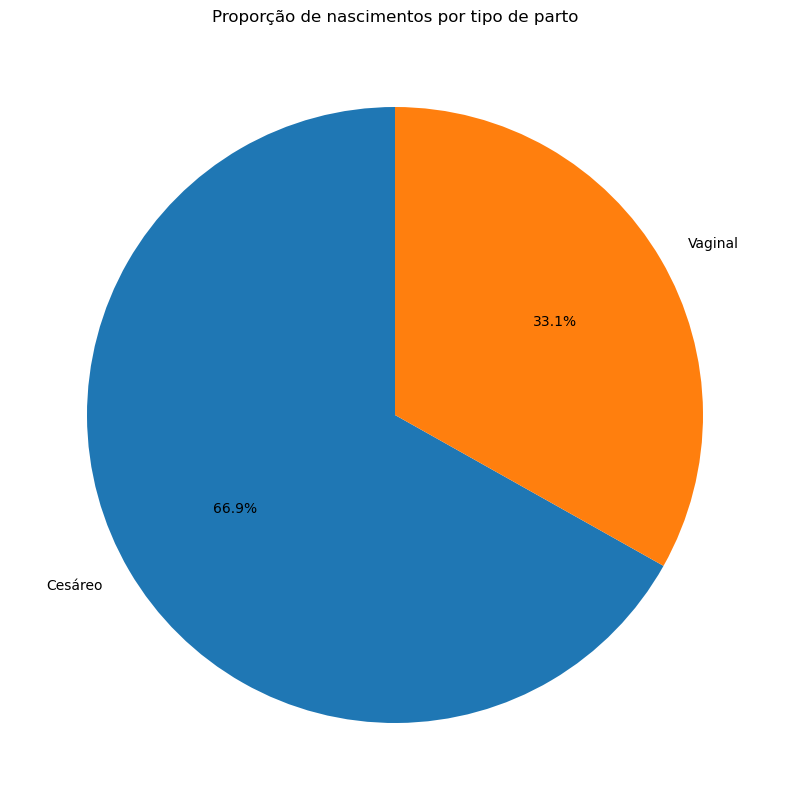

In [120]:
#Pie chart com qtd_partos
plt.figure(figsize=(10,10))
plt.pie(qtd_partos, labels=qtd_partos.index, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Proporção de nascimentos por tipo de parto')
plt.show()

Pelos dados analisados, há muito mais partos por cesária do que vaginal.

### Há alguma relação entre a escolaridade da mãe e a escolha entre cesárea e parto normal?

Dado que a proporção de cesáreas no dataset é bem alta, a escolaridade da mãe influencia de alguma forma nessa escolha?
Mães com um nível de escolaridade mais alto optam menos por cesárea?

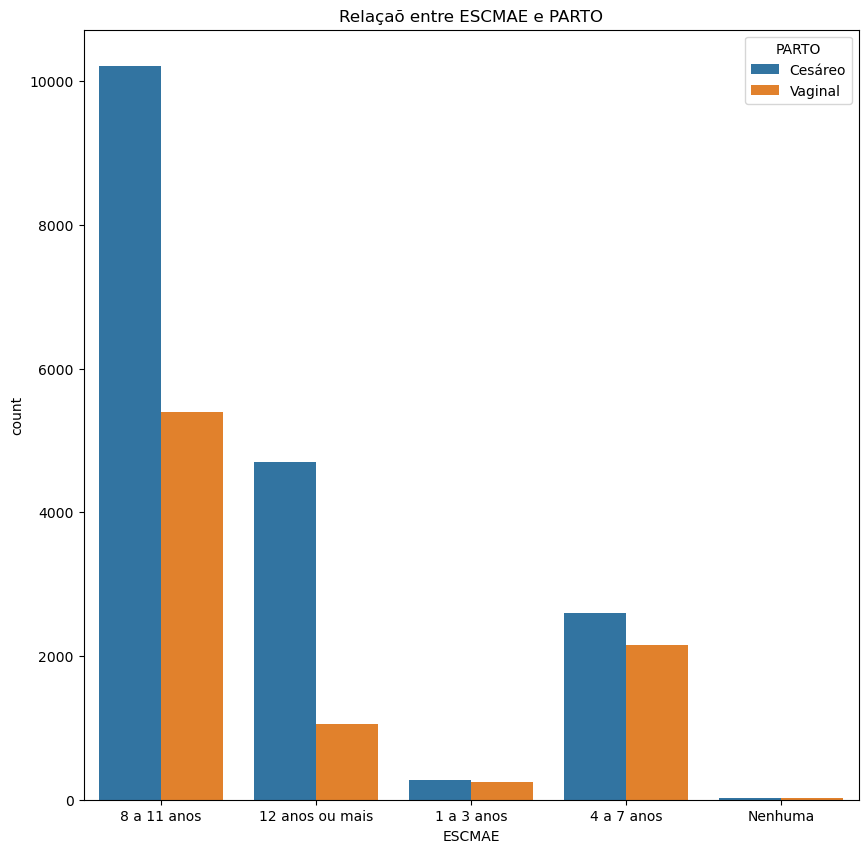

In [121]:
# Relação entre a escolaridade da mãe e o tipo de parto
plt.figure(figsize=(10,10))
sns.countplot(x='ESCMAE', hue='PARTO', data=sinasc_raw)
plt.title('Relaçaõ entre ESCMAE e PARTO')
plt.show()

A escolaridade da mãe parece não influenciar na escolha do tipo de parto.  A proporção de cesárias é bem alta em todos os niveis de escolaridade - embora se observe que essa proporção diminui de maneira significativa na escolaridade 1 a 3 anos

### Analisando qual cidade há mais nascimentos e a proporção de crianças do sexo feminino ou masculino

<Figure size 4000x3000 with 0 Axes>

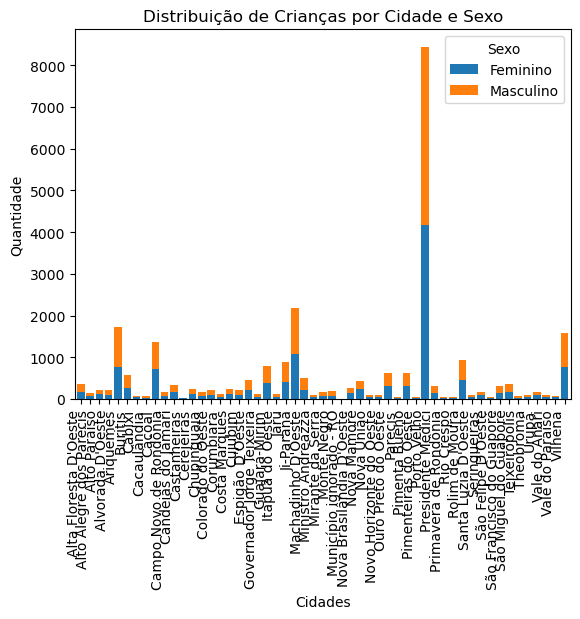

In [146]:
# Criar um DataFrame que contenha a contagem de crianças por cidade e sexo
dados_contagem = sinasc_raw.groupby(['munResNome', 'SEXO']).size().unstack(fill_value=0)

# Aumentar o tamanho da figura para tornar o nome das cidades mais visível
plt.figure(figsize=(40, 30))

# Aumentar o espaço entre as barras para melhor legibilidade dos nomes das cidades
dados_contagem.plot(kind='bar', stacked=True, width=0.8)

plt.xlabel('Cidades')
plt.ylabel('Quantidade')
plt.title('Distribuição de Crianças por Cidade e Sexo')
plt.legend(title='Sexo')
plt.xticks(rotation=90, ha='right')  # Rotacionar os rótulos do eixo x para melhor legibilidade

plt.show()

Com base nesses dados vemos uma quantidade imensa de nascimentos na cidade de Porto Velho (Capital) se comparado com as outras. O sexo da criança teve pouca variância, tendo quase uma proporção de 50/50